In [10]:
import pandas as pd
import statsmodels.api as sm
#import pylab
from scipy.stats import norm
import scipy.stats as ss

In [11]:
Q1= pd.read_csv('Cutlets.csv')
Q1.rename(columns = {'Unit A' : 'Unit_A', 'Unit B' : 'Unit_B'}, inplace = True)
Q1

,Unit_A,Unit_B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


### Normality Test:
We use QQ-plots and Shapiro test to check if both data sets have normal distribution.

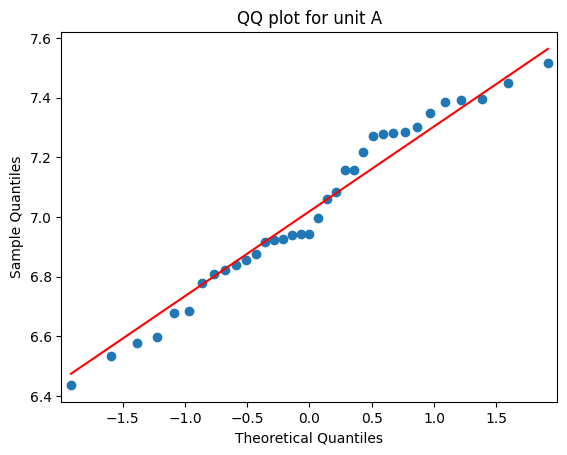

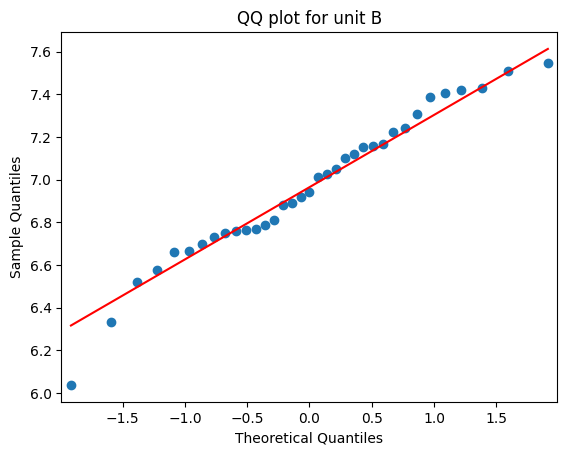

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming Q1.Unit_A and Q1.Unit_B are your data arrays

sm.qqplot(Q1.Unit_A, line='s')
plt.title('QQ plot for unit A')

sm.qqplot(Q1.Unit_B, line='s')
plt.title('QQ plot for unit B')

plt.show() # Display the plots

In [13]:
x = Q1.Unit_A.copy()
x = norm.rvs(size=35) # for shapiro-test, the random variables are normalised for better results.
ss.shapiro(Q1.Unit_A) #P-value greater than 0.05. So normally distributed

ShapiroResult(statistic=0.9649459719657898, pvalue=0.31998491287231445)

In [14]:
y = Q1.Unit_B.copy()
y = norm.rvs(size=35)
ss.shapiro(Q1.Unit_B)  #P-value greater than 0.05. So normally distributed

ShapiroResult(statistic=0.9727305769920349, pvalue=0.5225146412849426)

### Variance test

In [15]:
Q1.var() #Both variances are different in our view. Proceed to Levene test.

Unit_A    0.083179
Unit_B    0.117924
dtype: float64

In [16]:
ss.levene(Q1.Unit_A,Q1.Unit_B) #P-value = 0.417. Therefore greater than 0.05. Both Variances could be considered as same.

LeveneResult(statistic=0.6650897638632386, pvalue=0.417616221250256)

### 2-Sample t-test: 

In [17]:
ss.ttest_ind(Q1.Unit_A, Q1.Unit_B, equal_var=True) #p-value = 0.4722 which is greater than 0.05.

TtestResult(statistic=0.7228688704678063, pvalue=0.47223947245995, df=68.0)

### Result:
Since p-value > 0.05, we can accept the null hypothesis. 
That is, there is no significant difference between the diameters of the cutlet from both units.